Выделяют две больших группы методов, с помощью которых можно оценить результат кластеризации:

1) **Внутренние меры** — это метрики, которые оценивают качество кластеризации только по той информации, которая есть в неразмеченных данных.

2) **Внешние меры** — это метрики, которые используют, если в данных есть информация о некотором заранее известном разделении на кластеры, с которым можно сравнить полученный результат.

# <center>Внутренние меры</center>

В библиотеке *sklearn* реализованы три наиболее популярные метрики:

* коэффициент силуэта (Silhouette Coefficient);
* индекс Калински — Харабаса (Calinski-Harabasz Index);
* индекс Дэвиса — Болдина (Davies-Bouldin Index).

## <center>Коэффициент силуэта</center>

Коэффициент силуэта вычисляется по следующей формуле:

$$s_{i}=\frac{\left(b_{i}-a_{i}\right)}{\max \left(a_{i}, b_{i}\right)}$$

где:

* $a_i$ — среднее расстояние от данного объекта $x_i$ до объектов из того же кластера;
* $b_i$ — среднее расстояние от данного объекта $x_i$ до объектов из другого ближайшего кластера.

Для вычисления коэффициента силуэта в библиотеке *sklearn* используется `silhouette_score`:

In [ ]:
# #определяем алгоритм кластеризации
# km = KMeans(n_clusters=3, random_state=42)
# #обучаем его на наших данных
# km.fit_predict(X)
# #вычисляем значение коэффициента силуэта
# score = silhouette_score(X, km.labels_, metric='euclidean')

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

* Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.

* Значение близко к 0: кластеры пересекаются друг с другом.

* Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.


## <center>Индекс Калински — Харабаса</center>

Он показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров и вычисляется по следующей формуле:

$$\frac{SS_B}{SS_W}\times\frac{N-K}{K-1}$$

В данной формуле:

* $N$ — общее количество объектов;
* $K$ — количество кластеров;
* $SS_B$ — взвешенная межкластерная сумма квадратов расстояний;
* $SS_W$ — внутрикластерная сумма квадратов расстояний.

> Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены.

В библиотеке *sklearn* данный алгоритм реализуется с помощью метода `calinski_harabasz_score()`:

In [ ]:
# #определяем алгоритм кластеризации
# km = KMeans(n_clusters=3, random_state=42)
# #обучаем его на наших данных
# km.fit_predict(X)
# #вычисляем значение коэффициента Калински — Харабаса
# score = calinski_harabasz_score(X, km.labels_)

## <center>Индекс Дэвиса — Болдина</center>

Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

В библиотеке *sklearn* индекс Дэвиса — Болдина реализуется с помощью метода `davies_bouldin_score()`:

In [ ]:
# #определяем алгоритм кластеризации
# km = KMeans(n_clusters=3, random_state=42)
# #обучаем его на наших данных
# km.fit_predict(X)
# #вычисляем значение коэффициента Дэвиса — Болдина
# score = davies_bouldin_score(X, km.labels_)

## <center>Внутрикластерное расстояние</center>

Для того чтобы оценить качество кластеризации, можно вычислить суммарное внутрикластерное расстояние.

Разумеется, сумма этих расстояний должна быть минимальной — это тот случай, когда все элементы кластера совпадают с центроидом.

## <center>Межкластерное расстояние</center>

Здесь мы, разумеется, будем максимизировать результат, так как нам важно, чтобы элементы из разных кластеров были как можно меньше похожи друг на друга, а значит, чтобы расстояние между ними было как можно больше.

## <center>Отношение расстояний</center>

Логичным образом из предыдущих двух метрик (внутрикластерного и межкластерного расстояний) мы получаем отношение расстояний.

Таким образом мы можем учитывать оба функционала, рассмотренные ранее (расстояние внутри кластера и между кластерами), и оптимизировать отношение расстояний. Естественно, нам нужно, чтобы оно было минимальным — это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально.

# <center>Внешние меры</center>

Мы рассмотрели меры, которые можно использовать для оценки качества кластеризации, если данные являются полностью неразмеченными. Однако иногда бывает такое, что какая-то разметка в наших данных всё же есть. В этом случае мы можем использовать дополнительные показатели, которые помогут оценить качество кластеризации.

## <center>Индекс Рэнда</center>

В целом, это не совсем метрика для оценки качества кластеризации: индекс Рэнда — это мера сходства между двумя кластеризациями. Однако, так как он позволяет сравнить два разбиения на кластеры, мы можем использовать его для сравнения фактических меток классов и прогнозируемых меток кластеров, тем самым оценивая качество наших алгоритмов.

Данный индекс сравнивает фактическое разбиение и результат применения алгоритма кластеризации и оценивает, сколько пар, находившихся в одном или в разных кластерах, сохранили это состояние.

Для вычисления индекса Рэнда с помощью библиотеки *sklearn* можно использовать метод `rand_score()`:

In [ ]:
# print(rand_score([1, 1, 1, 2, 2], [1, 1, 2, 2, 3]))

Также используют **скорректированный индекс Рэнда (Adjusted Rand Index)**.

Его преимущество перед обычным индексом Рэнда состоит в том, что при случайных кластеризациях его значение близко к нулю вне зависимости от количества кластеров и наблюдений.

Исправленный индекс Рэнда в *sklearn* представлен через метод `adjusted_rand_score()`.

Интерпретация скорректированного индекса Рэнда:

* Отрицательные значения индекса говорят о различных, независимых разбиениях.

* Значения, близкие к нулю, являются индикаторами случайного разбиения.

* Положительные значения показывают схожесть разбиений (значение, равное , получается при полном совпадении кластеризаций).


## <center>Нормализованная взаимная информация</center>

Следующая мера — **NMI (Normalized Mutual Information)**, или **нормализованная взаимная информация**.

В *sklearn* для вычисления NMI существует метод `normalized_mutual_info_score()`.

С точки зрения оценки качества разбиения коэффициент должен быть как можно ближе к единице: нулевое значение указывает на случайное разбиение, а 1 — на максимальную согласованность.

## <center>Однородность</center>

**Однородность** (ещё её называют **гомогенностью**). Она показывает, насколько элементы в кластере похожи между собой.

Однородность также можно вычислить, воспользовавшись методом `homogeneity_score()` из библиотеки *sklearn*.

> Важно, чтобы показатель гомогенности был как можно ближе к единице: это говорит о том, что в кластере находятся элементы одного и того же класса. Если он близок к нулю, это означает, что в кластере находятся элементы из разных классов.

## <center>Полнота</center>

Результат кластеризации удовлетворяет требованиям полноты, если все элементы данных, принадлежащие к одному классу, оказались в одном кластере.

По аналогии с однородностью, важно, чтобы значение метрики было близко к единице.

Для вычисления полноты с помощью библиотеки *sklearn* используется метод `completeness_score()`.

## <center>V-мера</center>

Мы уже выяснили, что лучше рассматривать несколько мер сразу, так как каждая мера в отдельности может показывать высокое качество даже для плохого разбиения. В ответ на такую необходимость появляется метрика, которая является комбинацией метрик полноты и однородности и вычисляется как их гармоническое среднее, — это **V-мера**.

Напомним, что по умолчанию $\beta=1$, но это значение можно варьировать, если хочется придать разный вес разным свойствам:

* Если однородность кластеров важнее, чем их полнота, следует указать значение $\beta<1$. Тогда значение $\beta \ \times \ homogeneity$ в знаменателе получится небольшим и тем самым будет сильнее влиять на значение $v$. Чем меньше $\beta \ \times \ homogeneity$, тем выше $v$.

* Если однородность кластеров не особо важна, но важно, чтобы каждый кластер содержал максимальное количество похожих объектов, тогда мы регулируем значение $\beta$ так, чтобы оно было больше 1.

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

Для вычисления V-меры с помощью библиотеки *sklearn* используется метод `v_measure_score()`.

# <center>Практика</center>

In [1]:
# Задание 4.1

import numpy as np

X_train = np.loadtxt("data/train.txt")
y_train = np.loadtxt("data/train_labels.txt")
 
X_test = np.loadtxt("data/test.txt")
y_test = np.loadtxt("data/test_labels.txt")
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(10299, 561)

In [2]:
# Задание 4.2

len(np.unique(y))

6

Эти метки означают следующее:

1 — ходьба;
2 — подъём;
3 — спуск;
4 — сидение;
5 — стояние;
6 — лежание.

In [3]:
# Задание 4.3

from sklearn.preprocessing import StandardScaler

#определяем скейлер
scaler = StandardScaler()
#масштабируем данные
X_scaled = scaler.fit_transform(X)
#выводим нужное значение
X_scaled[0][0]

0.2105338541767611

In [6]:
# Задание 4.4

from sklearn.cluster import KMeans
from sklearn import metrics

#проходимся циклом по всем нужным нам значениям количества кластеров
for i in range(2,10):
	# обучаем модель k-means с текущим количеством кластеров
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
	#предсказываем метки
    y_pred = km.labels_
	#выводим результат для коэффициента силуэта
    print (i, metrics.silhouette_score(X_scaled,  y_pred))

2 0.3937324764077081
3 0.3165174060752722
4 0.27826450266863173
5 0.25967188010717684
6 0.11706978147952803
7 0.10120866778714624
8 0.09199222994561511
9 0.08267046481294245


In [7]:
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred= km.labels_
    print (i, metrics.calinski_harabasz_score(X_scaled,y_pred))

2 7880.813903657111
3 5034.470017849821
4 3668.0173727083115
5 2845.838894164787
6 2504.6858590869924
7 2171.068983512932
8 1890.8900519769945
9 1685.013483142379


In [8]:
for i in range(2,10):
    km = KMeans(n_clusters = i , random_state = 42 ).fit(X_scaled)
    y_pred = km.labels_
    print (i, metrics.davies_bouldin_score(X_scaled, y_pred))

2 1.0707441822385657
3 1.7838205288134954
4 2.0464376750898374
5 2.266485003212643
6 2.52599900702495
7 2.6502858155881905
8 2.619035633846788
9 2.7593862241965237


In [10]:
# Задание 4.5

from sklearn.metrics import homogeneity_score 
from sklearn.metrics import completeness_score 
from sklearn.metrics import adjusted_rand_score

#определяем модель k-means
model= KMeans(n_clusters=6, init='random', random_state=42)
#обучаем модель
model.fit(X_scaled)
#вычисляем значение однородности
print(homogeneity_score(y, model.labels_))
#вычисляем значение полноты
print(completeness_score(y, model.labels_))
#вычисляем значение скорректированного индекса Рэнда
print(adjusted_rand_score(y, model.labels_))

0.5406994702303469
0.5792825031740629
0.41962042580459846


In [11]:
# Задание 4.6

import pandas as pd

#создаём таблицу сопряжённости
ct = pd.crosstab(y, model.labels_)
#определяем название активностей
ct.index = ['ходьба', 'подъём', 
            'спуск', 'сидение', 'стояние', 'лежание']
ct.columns = list(range(1,7))

In [12]:
ct

,1,2,3,4,5,6
ходьба,741,897,0,0,84,0
подъём,297,1236,2,0,9,0
спуск,882,310,0,0,214,0
сидение,0,1,447,91,0,1238
стояние,0,0,560,0,0,1346
лежание,0,5,329,1556,0,54


In [ ]:
# Задание 4.7

# ctable = pd.crosstab(y, km.labels_)
# ctable.index = ['ходьба', 'подъём', 
#                 'спуск', 'сидение', 'стояние', 'лежание']
# ctable.columns = list(range(1,3))

In [ ]:
# ctable

In [17]:
# Задание 4.8

metrics.completeness_score(y, model.labels_)

0.5792825031740629

In [18]:
# Задание 4.10

from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2).fit(X_scaled)
print("Completeness: %0.3f" % metrics.completeness_score(y, ag.labels_))

Completeness: 1.000


# <center>PCA</center>

**PCA (Principal Component Analysis, метод главных компонент)**.

**Проклятие размерности** — это проблема, связанная с экспоненциальным возрастанием объёма данных из-за увеличения размерности пространства.

<u>Основные подходы к снижению размерности:</u>

* Удаление (фильтрация) признаков

* Извлечение новых признаков с помощью специальных алгоритмов

В PCA признаки преобразуются в новый набор переменных с меньшим (или таким же) количеством измерений, сохраняя при этом как можно больше вариаций, присутствующих в наборе данных. Геометрически это значит, что метод главных компонент ищет гиперплоскость заданной размерности, при проекции на которую сумма квадратов расстояний от исходных точек будет минимальной.

**Алгоритм реализации PCA**
1) Стандартизировать данные.
2) Рассчитать ковариационную матрицу для объектов.
3) Рассчитать собственные значения и собственные векторы для ковариационной матрицы.
4) Отсортировать собственные значения и соответствующие им собственные векторы.
5) Выбрать $k$ наибольших собственных значений и сформировать матрицу соответствующих собственных векторов.
6) Преобразовать исходные данные, умножив матрицу данных на матрицу отобранных собственных векторов.


In [19]:
# 1 шаг

import numpy as np
import pandas as pd
A = np.matrix([[1,2,3,4],
               [5,5,6,7],
               [1,4,2,3],
               [5,3,2,1],
               [8,1,2,2]])

df = pd.DataFrame(A,columns  = ['x1','x2','x3','x4'])
df_std  = (df - df.mean()) / (df.std())

In [21]:
# 2 шаг

cov_mat = np.cov(df_std.T)
cov_mat

array([[ 1.        , -0.31622777,  0.04811252, -0.18098843],
       [-0.31622777,  1.        ,  0.63900965,  0.61812254],
       [ 0.04811252,  0.63900965,  1.        ,  0.94044349],
       [-0.18098843,  0.61812254,  0.94044349,  1.        ]])

In [22]:
# 3 шаг

eigen_val, eigen_vectors = np.linalg.eig(cov_mat)

Следующие шаги я не конспенктил...

In [23]:
#импортируем нужный алгоритм

from sklearn.decomposition import PCA
#определяем метод главных компонент с двумя компонентами
pca = PCA(n_components=2)
#обучаем алгоритм на наших данных
principalComponents = pca.fit_transform(df_std)

In [24]:
principalComponents

array([[-1.40033078e-02, -7.55974765e-01],
       [ 2.55653399e+00,  7.80431775e-01],
       [ 5.14801919e-02, -1.25313470e+00],
       [-1.01415002e+00, -2.38808310e-04],
       [-1.57986086e+00,  1.22891650e+00]])

В параметр `n_components` в качестве значения можно передать количество необходимых компонентов или минимально допустимую объяснённую дисперсию в виде десятичной дроби. Например, если нам нужно столько компонент, чтобы они объясняли не менее 90 % разброса данных, то мы запишем `n_components = 0.9`.

In [25]:
# Задание 5.1

np.cov(np.array([3,4,1]),np.array([1,6,2])).sum()

14.333333333333334

In [26]:
# Задание 5.4

A = np.matrix([[8,7,2,9],
               [1,3,6,3],
               [7,2,0,3],
               [10,3,1,1],
               [8,1,3,4]])
 
df = pd.DataFrame(A)
df_std  = (df - df.mean()) / (df.std())
pca = PCA(n_components=0.9)
principalComponents = pca.fit_transform(df_std)

In [27]:
principalComponents

array([[ 1.61145254,  1.76368007, -0.01320928],
       [-2.08441051,  1.01724955,  0.24417084],
       [ 0.29568142, -0.95946326,  0.05272576],
       [ 0.50390826, -1.24373821,  0.50808763],
       [-0.3266317 , -0.57772816, -0.79177495]])

# <center>SVD и t-SNE</center>

**Сингулярное разложение (SVD)**

Для того чтобы реализовать сингулярное разложение с помощью библиотеки *sklearn*, необходимо использовать алгоритм `TruncatedSVD()`, в который передаётся `n_components` в качестве параметра, определяющего количество итоговых компонент:

In [ ]:
# # создаём объект класса TruncatedSVD
# # n_components — размерность нового пространства, n_iter — количество итераций
# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# # обучаем модель на данных X
# svd.fit(X)
# # применяем уменьшение размерности к матрице X
# transformed = svd.transform(X)

**t-SNE (стохастическое вложение соседей с t-распределением)**

Его преимущество относительно первых двух заключается в том, что он может реализовывать уменьшение размерности и разделение для данных, которые являются линейно неразделимыми.

После снижения размерности расстояние между двумя точками должно быть значительно больше расстояния, которое можно получить в гауссовом распределении. Эту проблему называют **«проблемой скученности»**, и для её решения используют **распределение Стьюдента**. Оно похоже на распределение Гаусса (и для больших выборок практически совпадает с ним), однако имеет большие вероятности на участках, отдалённых от нуля. Сравнение распределений Гаусса и Стьюдента можно увидеть на графике ниже:

![image.png](https://lms-cdn.skillfactory.ru/assets/courseware/v1/e2d17e7208e4fad45bda2ae720d91ee6/asset-v1:Skillfactory+DSMED+2023+type@asset+block/MATHML_md11_6_10.png)

В t-SNE используется именно распределение Стьюдента.

Для реализации t-SNE в *sklearn* понадобится алгоритм `TSNE()`:

In [ ]:
# # импортируем класс TSNE из модуля manifold библиотеки sklearn
# from sklearn.manifold import TSNE
# # создаём объект класса TSNE
# # n_components — размерность нового пространства
# tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# # обучаем модель на данных X и применяем к матрице X уменьшение размерности
# tsne.fit_transform(X)

In [29]:
df = pd.read_csv('data/Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [30]:
# Задание 7.1

df['life_expec'].max()

82.8

In [31]:
# Задание 7.2

X = df.drop('country',axis =1)  
y = df['country']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0][0]

1.2915323778422956

<Axes: >

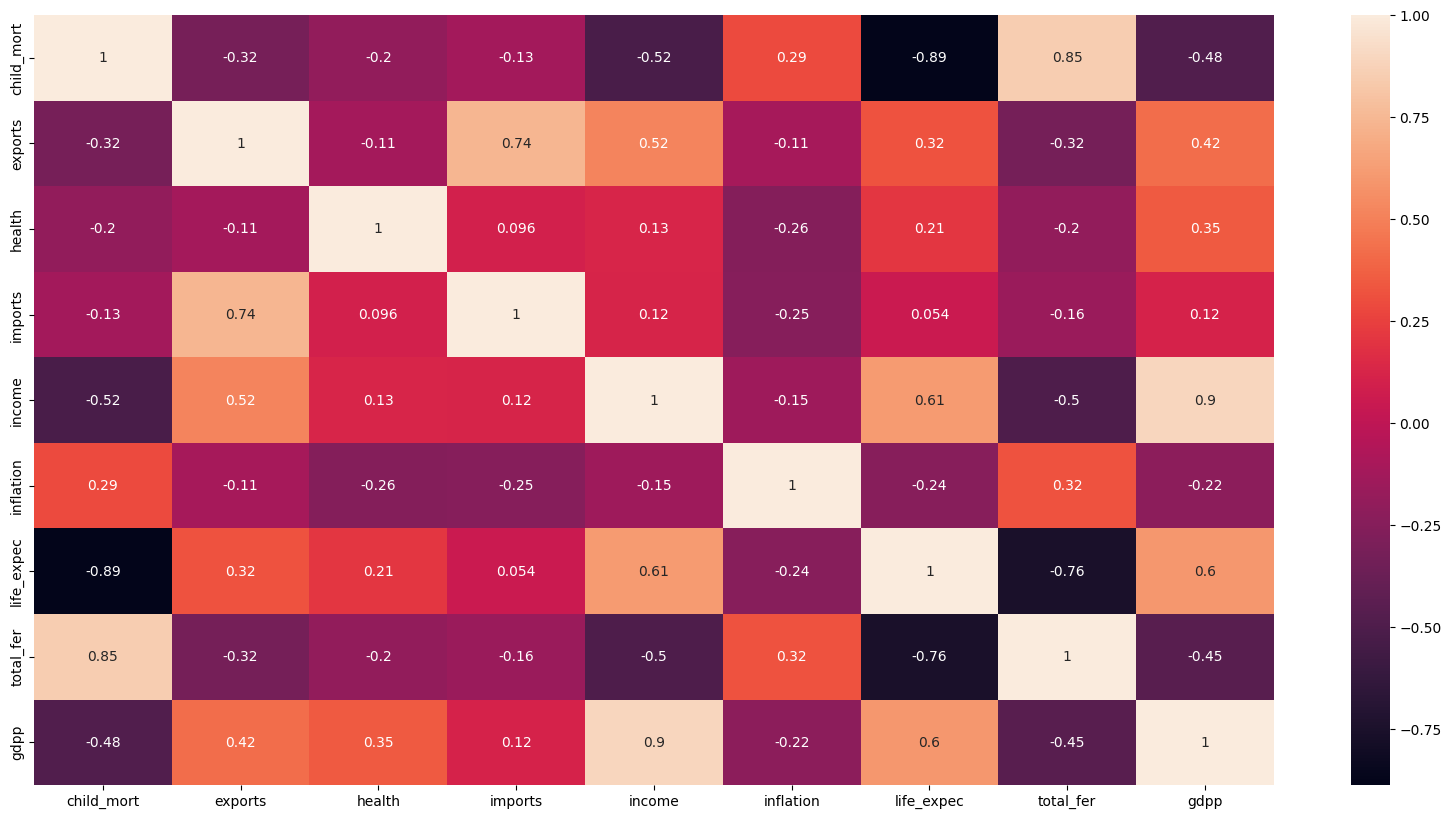

In [32]:
# Задание 7.3

import matplotlib.pyplot as plt
import seaborn as sns

X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)

In [33]:
# Задание 7.4

pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
len(pca.components_)

5

In [34]:
# Задание 7.5

pca.explained_variance_ratio_[0]

0.45951739786095896

<Axes: >

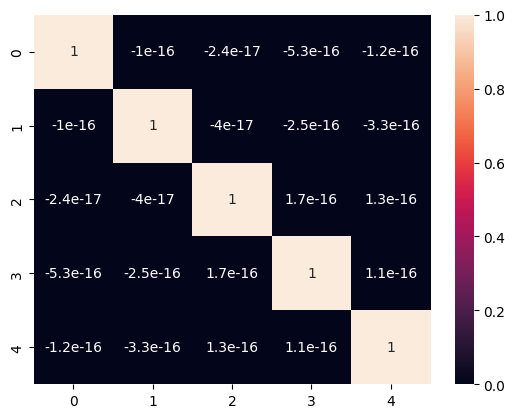

In [35]:
# Задание 7.6

X_pca = pca.fit_transform(X_scaled)
corrmat = np.corrcoef(X_pca.transpose())
sns.heatmap(corrmat, annot=True)

In [36]:
# Задание 7.7

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

from sklearn.metrics import silhouette_score

for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i, random_state = 1)
    kmeans.fit(X_pca)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print(i, silhouette_avg)

2 0.28493960133786356
3 0.3079769786519014
4 0.32041373564415604
5 0.24796729244571458
6 0.23487112340554764
7 0.24412506184527263
8 0.2398550154102064
9 0.23319218781273082
10 0.22759425188427676


<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

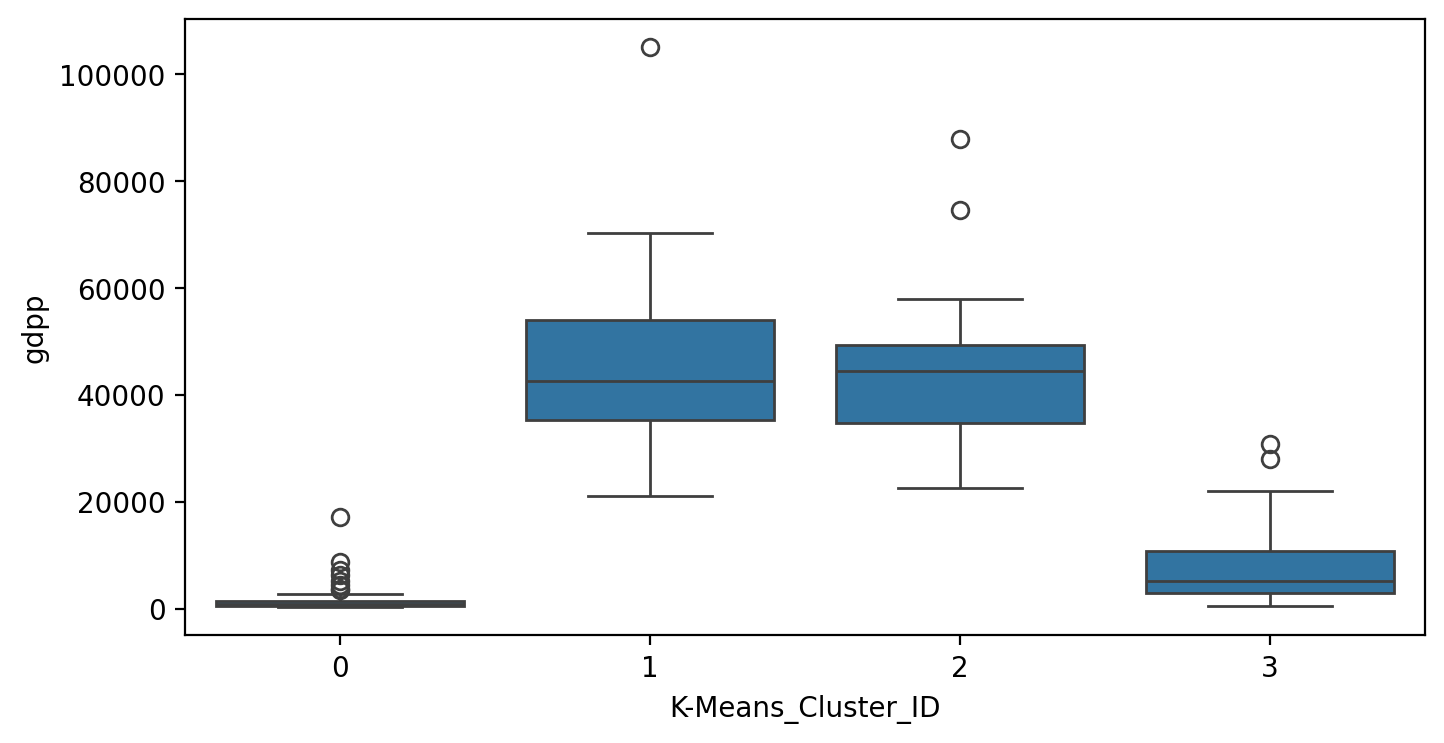

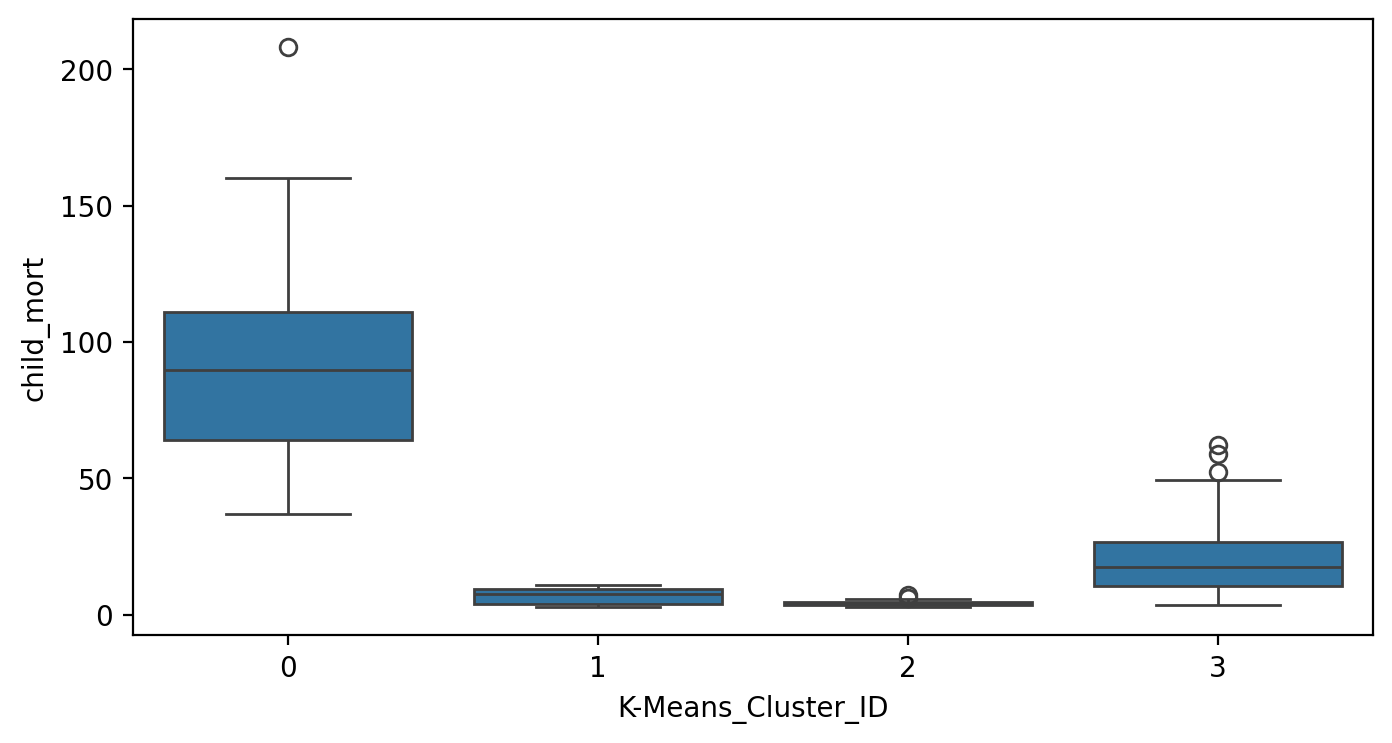

In [37]:
# Задание 7.8

kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X_pca)
df['K-Means_Cluster_ID'] = kmeans.labels_
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=df)
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=df)

In [38]:
# Задание 7.9

K_Means_countries = df[df['K-Means_Cluster_ID'] == 1]
K_Means_countries.sort_values(by = 'life_expec')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
157,United Arab Emirates,8.6,77.7,3.66,63.6,57600,12.500,76.5,1.87,35000,1
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,1
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
